In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pickle

os.environ['KMP_DUPLICATE_LIB_OK']='True'

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression

### A SHORT DESCRIPTION OF THE FEATURES.

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [6]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
df.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

### visualize

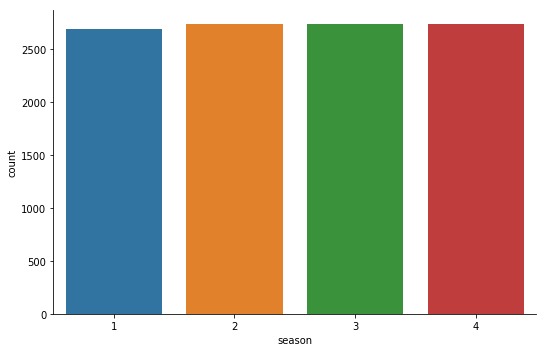

In [8]:
sns.factorplot(x='season',data=df,kind='count',size=5,aspect=1.5)

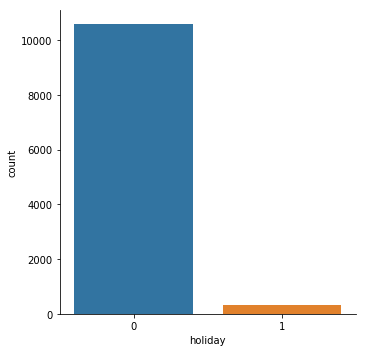

In [9]:
df.holiday.value_counts()
sns.factorplot(x='holiday',data=df,kind='count',size=5,aspect=1) # mayoritas peminjaman di non holiday

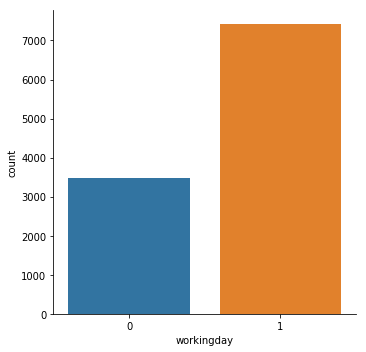

In [10]:
df.workingday.value_counts()
sns.factorplot(x='workingday',data=df,kind='count',size=5,aspect=1) # mayoritas peminjaman di workinday

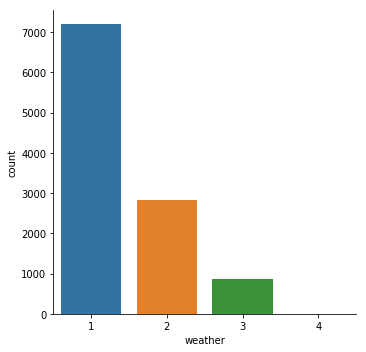

In [11]:
df.weather.value_counts()
sns.factorplot(x='weather', data=df, kind='count', size=5, aspect=1) #mayoritas peminjaman pada musim 1

#### variation variable

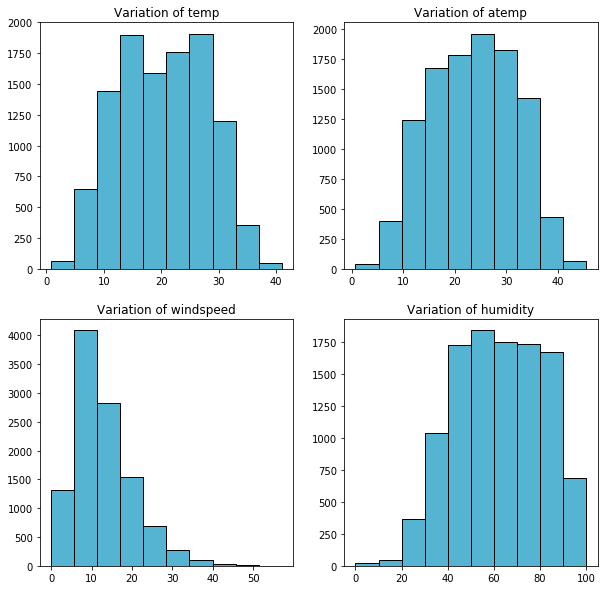

In [12]:
# can also be visulaized using histograms for all the continuous variables.
df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=df,edgecolor="black",linewidth=1,color='#56B4D3')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=df,edgecolor="black",linewidth=1,color='#56B4D3')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=df,edgecolor="black",linewidth=1,color='#56B4D3')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=df,edgecolor="black",linewidth=1,color='#56B4D3')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

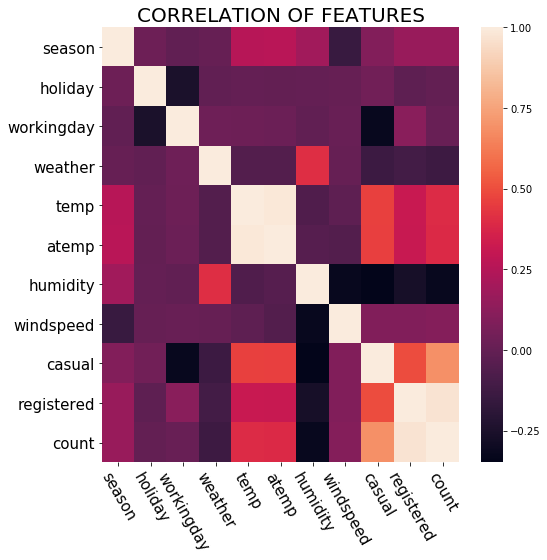

In [13]:
plt.figure(figsize=(8,8))
plt.title("CORRELATION OF FEATURES", fontsize=20)
sns.heatmap(df.corr())
plt.xticks(rotation=(-60), fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [14]:
### one-hot-encoding dummy variable
season=pd.get_dummies(df['season'],prefix='season')
df=pd.concat([df,season],axis=1)
df.head()
season=pd.get_dummies(df_test['season'],prefix='season')
df_test=pd.concat([df_test,season],axis=1)
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


In [15]:
weather=pd.get_dummies(df['weather'],prefix='weather')
df=pd.concat([df,weather],axis=1)
df.head()
weather=pd.get_dummies(df_test['weather'],prefix='weather')
df_test=pd.concat([df_test,weather],axis=1)
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


In [16]:
df.drop(['season','weather'],inplace=True,axis=1)
df_test.drop(['season','weather'],inplace=True,axis=1)
#df.drop(df.columns[[1,4]], axis=1, inplace=True)
#df_test.drop(df.columns[[1,4]], axis=1, inplace=True)
#df.drop('season', axis=1, inplace=True)

In [17]:
df["hour"] = [t.hour for t in pd.DatetimeIndex(df.datetime)]
df["dow"] = [t.dayofweek for t in pd.DatetimeIndex(df.datetime)]
df['week'] = [t.week for t in pd.DatetimeIndex(df.datetime)]
df["month"] = [t.month for t in pd.DatetimeIndex(df.datetime)]
df['year'] = [t.year for t in pd.DatetimeIndex(df.datetime)]
df['day'] = [t.day for t in pd.DatetimeIndex(df.datetime)]
df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,weather_1,weather_2,weather_3,weather_4,hour,dow,week,month,year,day
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,1,0,0,0,0,5,52,1,2011,1
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,1,0,0,0,1,5,52,1,2011,1
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,1,0,0,0,2,5,52,1,2011,1
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,1,0,0,0,3,5,52,1,2011,1
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,1,0,0,0,4,5,52,1,2011,1


In [18]:
df_test["hour"] = [t.hour for t in pd.DatetimeIndex(df_test.datetime)]
df_test["dow"] = [t.dayofweek for t in pd.DatetimeIndex(df_test.datetime)]
df_test['week'] = [t.week for t in pd.DatetimeIndex(df_test.datetime)]
df_test["month"] = [t.month for t in pd.DatetimeIndex(df_test.datetime)]
df_test['year'] = [t.year for t in pd.DatetimeIndex(df_test.datetime)]
df_test['day'] = [t.day for t in pd.DatetimeIndex(df_test.datetime)]
df_test.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,...,weather_1,weather_2,weather_3,weather_4,hour,dow,week,month,year,day
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,...,1,0,0,0,0,3,3,1,2011,20
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,...,1,0,0,0,1,3,3,1,2011,20
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,...,1,0,0,0,2,3,3,1,2011,20
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,...,1,0,0,0,3,3,3,1,2011,20
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,...,1,0,0,0,4,3,3,1,2011,20


In [19]:
# now can drop datetime column.
df.drop('datetime',axis=1,inplace=True)

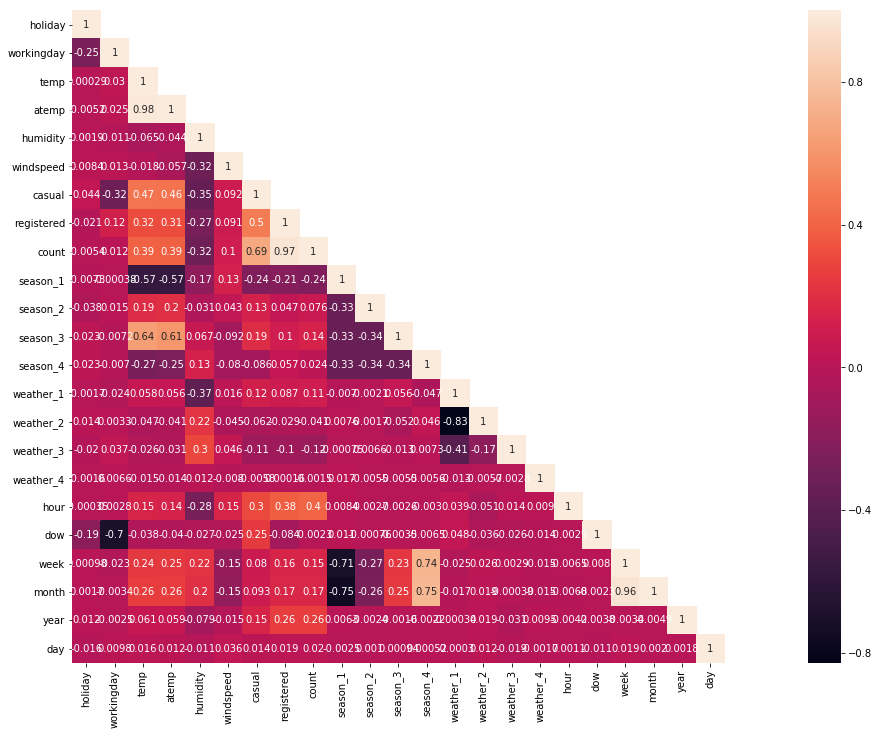

In [20]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [21]:
df.drop(['casual','registered'],axis=1,inplace=True)

### visualize 

/Users/adamwidibagaskarta/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


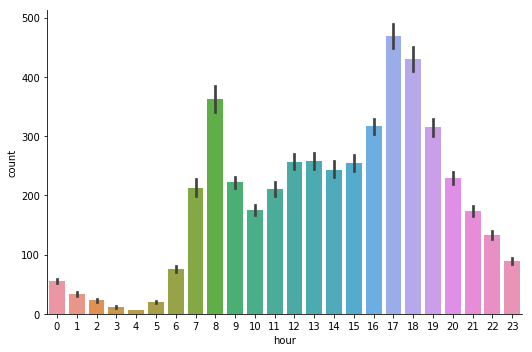

In [22]:
sns.factorplot(x="hour",y="count",data=df,kind='bar',size=5,aspect=1.5) #banyak pengguna pada setiap jamnya

/Users/adamwidibagaskarta/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


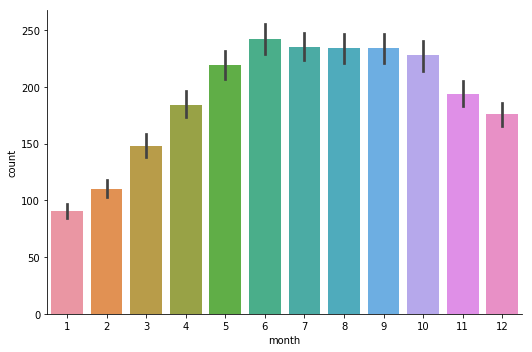

In [23]:
sns.factorplot(x="month",y="count",data=df,kind='bar',size=5,aspect=1.5) #banyak pengguna pada setiap bulannya

/Users/adamwidibagaskarta/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


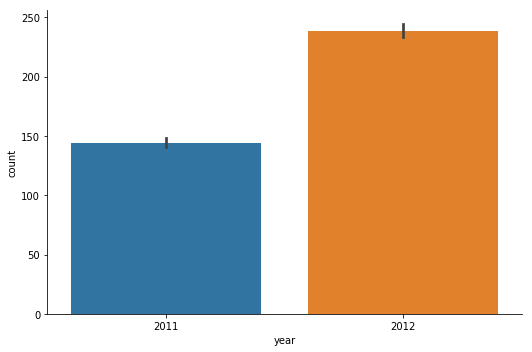

In [24]:
sns.factorplot(x="year",y="count",data=df,kind='bar',size=5,aspect=1.5)

/Users/adamwidibagaskarta/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


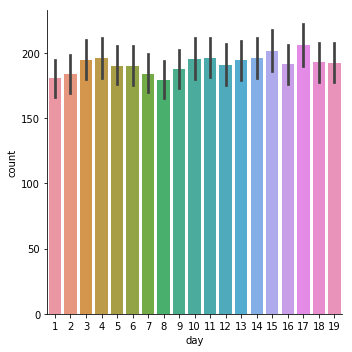

In [25]:
sns.factorplot(x="day",y='count',kind='bar',data=df,size=5,aspect=1) #banyak pengguna di setiap harinya

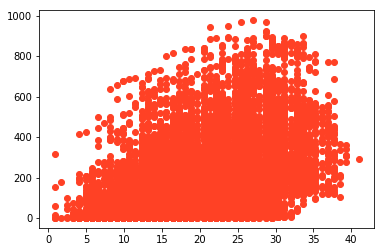

In [26]:
plt.scatter(x="temp",y="count",data=df,color='#ff4125')

## Regression Process

In [27]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_score

In [28]:
X = df.loc[:, df.columns != 'count']
y = np.log(df['count'])

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [30]:
pipelines = []

pipelines.append(('ScaledGBM', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor(random_state=42))])))
pipelines.append(('ScaledRFR', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('RFR', RandomForestRegressor(random_state=42))])))
pipelines.append(('ScaledXGBR', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('XGBR', XGBRegressor(random_state=42))])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(random_state=42)
    cv_results = -cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_log_error')
    results.append(np.sqrt(cv_results))
    names.append(name)
    msg = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/adamwidibagaskarta/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:426: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


ScaledGBM: 0.01487248139695755 (0.0005800696994265416)


/Users/adamwidibagaskarta/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:426: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
/Users/adamwidibagaskarta/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/adamwidibagaskarta/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/adamwidibagaskarta/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 i

ScaledRFR: 0.015778759041799446 (0.0007083884826775098)


/Users/adamwidibagaskarta/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:426: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


ScaledXGBR: 0.014724016236166463 (0.00037965379173868577)


### using XGBoost

In [31]:
standardscaler = StandardScaler()
model = XGBRegressor(colsample_bytree=0.7, learning_rate=0.05, max_depth=7, 
                     min_child_weight=4, subsample=0.7, random_state=42)

In [32]:
model.fit(x_train, y_train)
# save model to file
pickle.dump(model, open("model_2.pickle", "wb"))

In [ ]:
#model.predict(df_test.drop(['datetime','count'],axis=1))

In [33]:
pipe = Pipeline([('poly', PolynomialFeatures()), ('StandardScaler', standardscaler), ('XGBR', model)])
pipe.fit(x_train, y_train)
y_pred = np.exp(pipe.predict(df_test.drop('datetime',axis=1)))
y_pred

array([ 13.2664585,   5.442532 ,   3.4233918, ..., 156.38538  ,
       105.11385  ,  59.56758  ], dtype=float32)

In [ ]:
df_test['count'] = y_pred
df_test.to_csv('answer_with_XGBoost.csv',index=False)

## Save Model 

untuk mencoba load model dari pickle dan menggunakannya untuk testing data

In [ ]:
loaded_model = pickle.load(open("model.pickle", "rb"))

In [ ]:
model.predict(df_test.drop(['datetime','count'],axis=1))

In [ ]:
pipe = Pipeline([('poly', PolynomialFeatures()), ('StandardScaler', standardscaler), ('XGBR', loaded_model)])
pipe.fit(x_train, y_train)
y_pred = np.exp(pipe.predict(df_test.drop(['datetime','count'],axis=1)))
y_pred